In [2]:
!pip install numpy opencv-python matplotlib scikit-image

In [3]:
!pip install opencv-python --index-url https://pypi.org/simple


# Texture Analysis
- FFT
- LBP

In [9]:
!pip install mtcnn


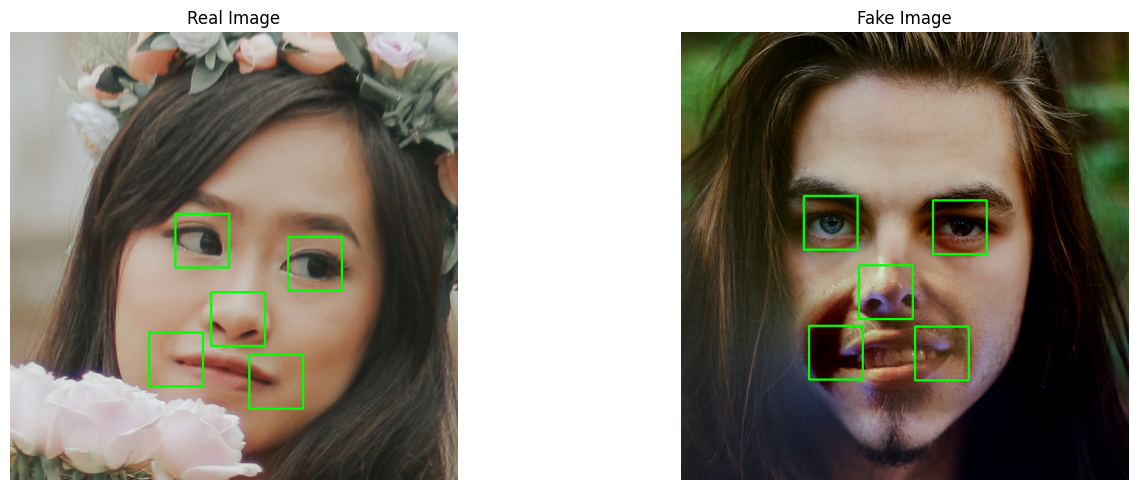

In [19]:
import cv2
import matplotlib.pyplot as plt
from mtcnn import MTCNN

# Initialize MTCNN detector
detector = MTCNN()

# Load the images
image_0 = cv2.imread(r'C:\Users\tanbe\OneDrive\Desktop\Works\HWUM\FYP\fakefacedetect\data\raw\real_and_fake_face_detection\real_and_fake_face\training_real\real_00002.jpg')
image_1 = cv2.imread(r'C:\Users\tanbe\OneDrive\Desktop\Works\HWUM\FYP\fakefacedetect\data\raw\real_and_fake_face_detection\real_and_fake_face\training_fake\easy_15_0011.jpg')

# Convert BGR to RGB for correct color representation
image_0_rgb = cv2.cvtColor(image_0, cv2.COLOR_BGR2RGB)
image_1_rgb = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)

# Detect faces and keypoints in each image
detections_0 = detector.detect_faces(image_0_rgb)
detections_1 = detector.detect_faces(image_1_rgb)

# Define a function to draw 18x18 square around each keypoint and save the modified image
def draw_keypoint_squares(image, detections):
    image_copy = image.copy()  # Create a copy of the image for modification
    for det in detections:
        keypoints = det['keypoints']
        for point_name, point in keypoints.items():
            x, y = point
            # Draw 18x18 square around the keypoint
            start_point = (x - 36, y - 36)  # Top-left corner
            end_point = (x + 36, y + 36)    # Bottom-right corner
            cv2.rectangle(image_copy, start_point, end_point, (0, 255, 0), 2)  # Green square with thickness of 2
    return image_copy

# Draw squares on each image and store the modified images
image_0_with_squares = draw_keypoint_squares(image_0_rgb, detections_0)
image_1_with_squares = draw_keypoint_squares(image_1_rgb, detections_1)

# Plot the images with keypoint squares
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot Real Image with squares
axs[0].imshow(image_0_with_squares)
axs[0].set_title('Real Image')
axs[0].axis('off')

# Plot Fake Image with squares
axs[1].imshow(image_1_with_squares)
axs[1].set_title('Fake Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()


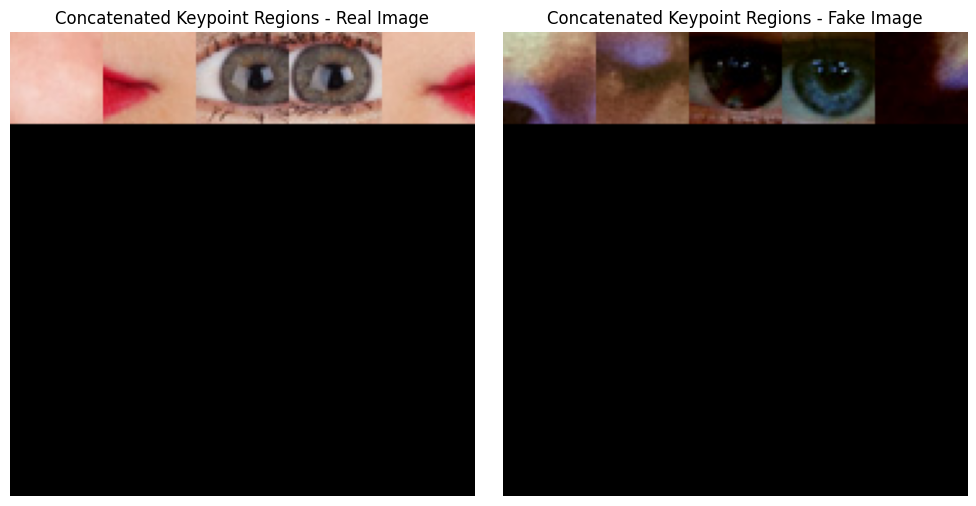

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mtcnn import MTCNN

# Initialize MTCNN detector
detector = MTCNN()

# Load the images
image_0 = cv2.imread(r'C:\Users\tanbe\OneDrive\Desktop\Works\HWUM\FYP\fakefacedetect\data\raw\real_and_fake_face_detection\real_and_fake_face\training_real\real_00002.jpg')
image_1 = cv2.imread(r'C:\Users\tanbe\OneDrive\Desktop\Works\HWUM\FYP\fakefacedetect\data\raw\real_and_fake_face_detection\real_and_fake_face\training_fake\easy_15_0011.jpg')

# Convert BGR to RGB for correct color representation
image_0_rgb = cv2.cvtColor(image_0, cv2.COLOR_BGR2RGB)
image_1_rgb = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)

# Detect faces and keypoints in each image
detections_0 = detector.detect_faces(image_0_rgb)
detections_1 = detector.detect_faces(image_1_rgb)

# Function to extract and concatenate 36x36 regions around keypoints into a 5x5 grid
def extract_and_concatenate_regions(image, detections):
    # Initialize a 180x180 grid (5x5 of 36x36 pixels each)
    concatenated_image = np.zeros((180, 180, 3), dtype=np.uint8)
    
    for i, det in enumerate(detections[:1]):  # Limit to first detected face
        keypoints = det['keypoints']
        for j, (point_name, point) in enumerate(keypoints.items()):
            x, y = point
            # Crop 36x36 region around the keypoint
            cropped_region = image[max(y-18, 0):y+18, max(x-18, 0):x+18]
            resized_region = cv2.resize(cropped_region, (36, 36))
            
            # Place each 36x36 region into the 5x5 grid
            row = j // 5 * 36
            col = j % 5 * 36
            concatenated_image[row:row+36, col:col+36] = resized_region

    return concatenated_image

# Extract and concatenate regions for both images
concat_image_0 = extract_and_concatenate_regions(image_0_rgb, detections_0)
concat_image_1 = extract_and_concatenate_regions(image_1_rgb, detections_1)

# Plot the concatenated images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(concat_image_0)
axs[0].set_title('Concatenated Keypoint Regions - Real Image')
axs[0].axis('off')

axs[1].imshow(concat_image_1)
axs[1].set_title('Concatenated Keypoint Regions - Fake Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()


In [23]:
concat_image_1.shape

(180, 180, 3)

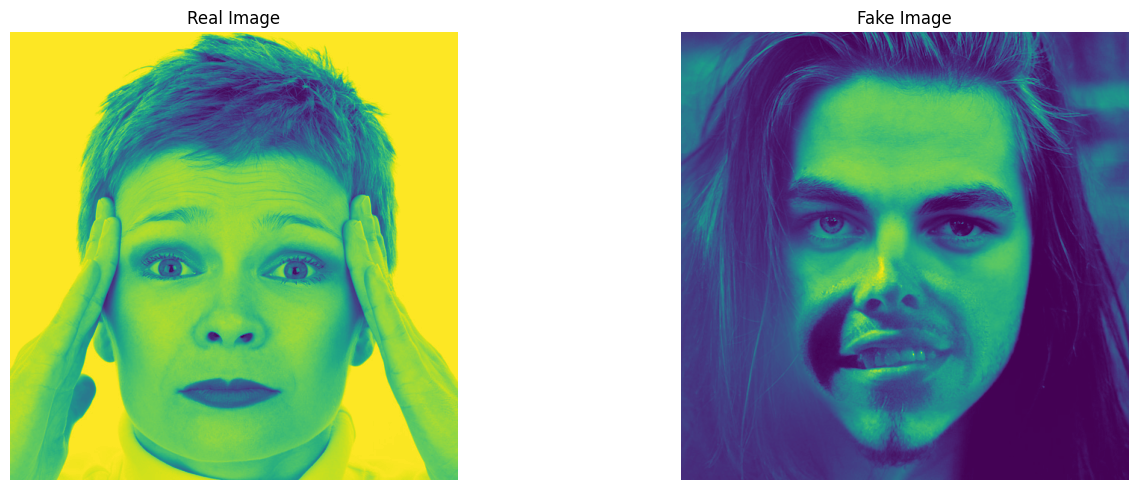

In [24]:
import cv2
import matplotlib.pyplot as plt

# Load the images
image_0 = cv2.imread(r'C:\Users\tanbe\OneDrive\Desktop\Works\HWUM\FYP\fakefacedetect\data\raw\real_and_fake_face_detection\real_and_fake_face\training_real\real_00002.jpg')
image_1 = cv2.imread(r'C:\Users\tanbe\OneDrive\Desktop\Works\HWUM\FYP\fakefacedetect\data\raw\real_and_fake_face_detection\real_and_fake_face\training_fake\easy_15_0011.jpg')

# Convert BGR to RGB for correct color representation
image_0 = cv2.cvtColor(image_0, cv2.COLOR_BGR2GRAY)
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Real Image
axs[0].imshow(image_0)
axs[0].set_title('Real Image')
axs[0].axis('off')  # Hide axes ticks

# Fake Image
axs[1].imshow(image_1)
axs[1].set_title('Fake Image')
axs[1].axis('off')  # Hide axes ticks

plt.tight_layout()
plt.show()


[8.55555556e-04 2.58805556e-02 4.14777778e-01 5.05777778e-01
 4.78555556e-02 4.49444444e-03 3.00000000e-04 5.55555556e-05
 2.77777778e-06]


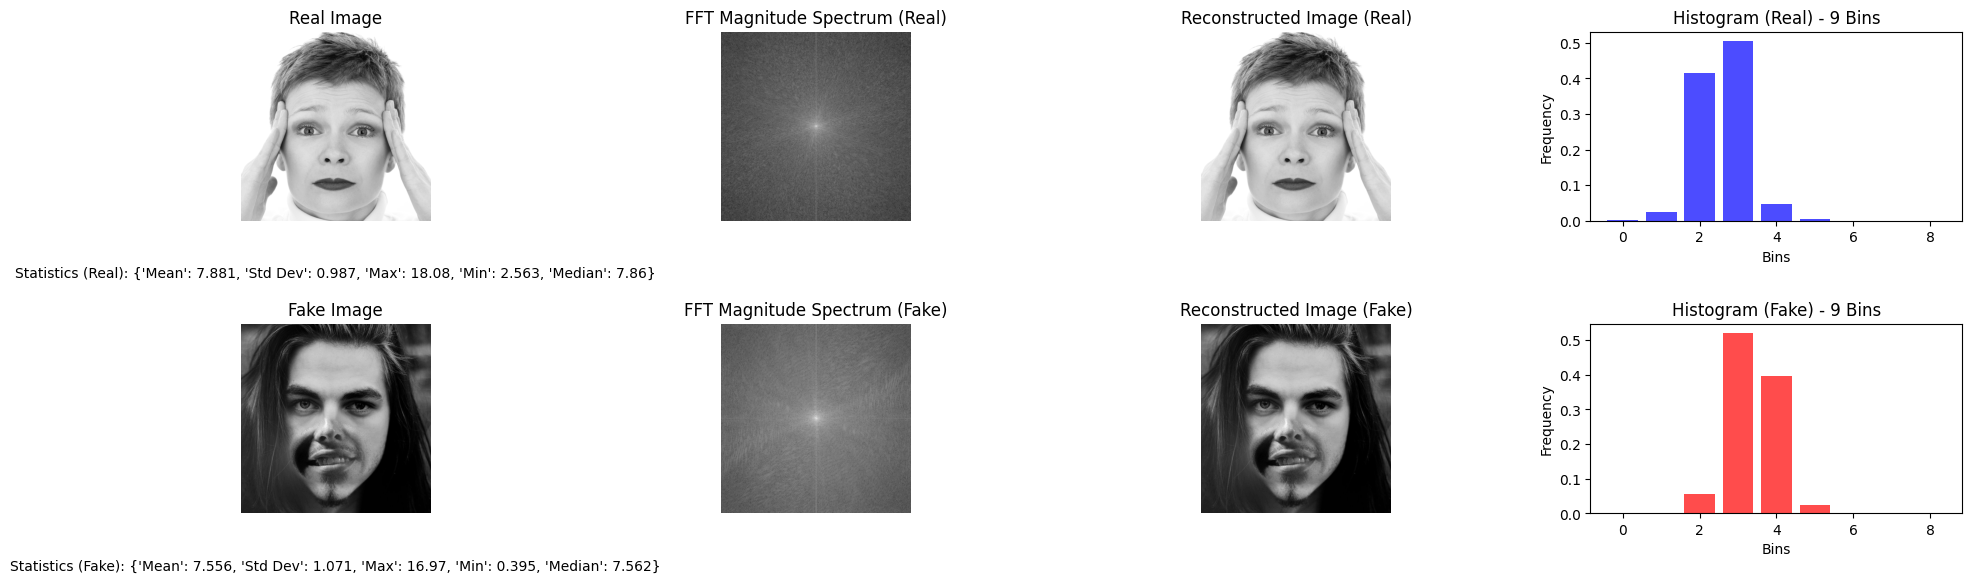

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_fft(img):
    """
    Apply Fast Fourier Transform (FFT) to an image to analyze frequency components.
    
    Args:
        img (np.ndarray): Image to process.
        
    Returns:
        tuple: FFT of image, shifted FFT, magnitude spectrum.
    """
    # Compute FFT and shift the zero-frequency component to the center
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift) + 1)  # Use log for better visibility
    
    return f, fshift, magnitude_spectrum

def apply_ifft(fshift):
    """
    Apply Inverse FFT to the shifted FFT to transform it back to the original image.
    
    Args:
        fshift (np.ndarray): Shifted FFT of an image.
        
    Returns:
        np.ndarray: Image reconstructed from the IFFT of the magnitude spectrum.
    """
    # Inverse FFT shift and apply IFFT
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.abs(np.fft.ifft2(f_ishift))
    return img_back

def compute_histogram(image, bins=9):
    """
    Compute a histogram of the power spectrum for the given image.
    
    Args:
        image (np.ndarray): Image to compute histogram on.
        bins (int): Number of histogram bins.
        
    Returns:
        np.ndarray: Normalized histogram of the image.
    """
    histogram, bin_edges = np.histogram(image, bins=bins, range=(image.min(), image.max()))
    histogram = histogram / np.sum(histogram)  # Normalize histogram
    return histogram


def extract_statistics(image):
    stats = {
        'Mean': round(np.mean(image), 3),
        'Std Dev': round(np.std(image), 3),
        'Max': round(np.max(image), 3),
        'Min': round(np.min(image), 3),
        'Median': round(np.median(image), 3)
    }
    return stats
# Example images (to be loaded as grayscale images)
# image_0 = cv2.imread('path_to_real_image.jpg', cv2.IMREAD_GRAYSCALE)
# image_1 = cv2.imread('path_to_fake_image.jpg', cv2.IMREAD_GRAYSCALE)

# Process the real and fake images
fft_0, fft_shift_0, fft_magnitude_0 = apply_fft(image_0)
fft_1, fft_shift_1, fft_magnitude_1 = apply_fft(image_1)

# Apply IFFT to retrieve the reconstructed images
ifft_image_0 = apply_ifft(fft_shift_0)
ifft_image_1 = apply_ifft(fft_shift_1)

# Compute histograms of the power spectra
bins=9
histogram_0 = compute_histogram(fft_magnitude_0,bins)
print(histogram_0)
histogram_1 = compute_histogram(fft_magnitude_1,bins)

# FFT plots in separate figure
fig_fft, axs_fft = plt.subplots(2, 4, figsize=(20, 6))

# Real Image
axs_fft[0][0].imshow(image_0, cmap='gray')
axs_fft[0][0].set_title('Real Image')
axs_fft[0][0].axis('off')

axs_fft[0][1].imshow(fft_magnitude_0, cmap='gray')
axs_fft[0][1].set_title('FFT Magnitude Spectrum (Real)')
axs_fft[0][1].axis('off')

axs_fft[0][2].imshow(ifft_image_0, cmap='gray')
axs_fft[0][2].set_title('Reconstructed Image (Real)')
axs_fft[0][2].axis('off')

# Display the histogram of power spectrum as bar plot
axs_fft[0][3].bar(range(bins), histogram_0, color='blue', alpha=0.7)
axs_fft[0][3].set_title(f'Histogram (Real) - {bins} Bins')
axs_fft[0][3].set_xlabel('Bins')
axs_fft[0][3].set_ylabel('Frequency')

# Fake Image
axs_fft[1][0].imshow(image_1, cmap='gray')
axs_fft[1][0].set_title('Fake Image')
axs_fft[1][0].axis('off')

axs_fft[1][1].imshow(fft_magnitude_1, cmap='gray')
axs_fft[1][1].set_title('FFT Magnitude Spectrum (Fake)')
axs_fft[1][1].axis('off')

axs_fft[1][2].imshow(ifft_image_1, cmap='gray')
axs_fft[1][2].set_title('Reconstructed Image (Fake)')
axs_fft[1][2].axis('off')

# Display the histogram of power spectrum as bar plot
axs_fft[1][3].bar(range(bins), histogram_1, color='red', alpha=0.7)
axs_fft[1][3].set_title(f'Histogram (Fake) - {bins} Bins')
axs_fft[1][3].set_xlabel('Bins')
axs_fft[1][3].set_ylabel('Frequency')

# Display statistics below the images
axs_fft[0][0].text(0.5, -0.3, f'Statistics (Real): {extract_statistics(fft_magnitude_0)}', 
                   transform=axs_fft[0][0].transAxes, fontsize=10, ha='center')
axs_fft[1][0].text(0.5, -0.3, f'Statistics (Fake): {extract_statistics(fft_magnitude_1)}', 
                   transform=axs_fft[1][0].transAxes, fontsize=10, ha='center')

plt.tight_layout()
plt.show()

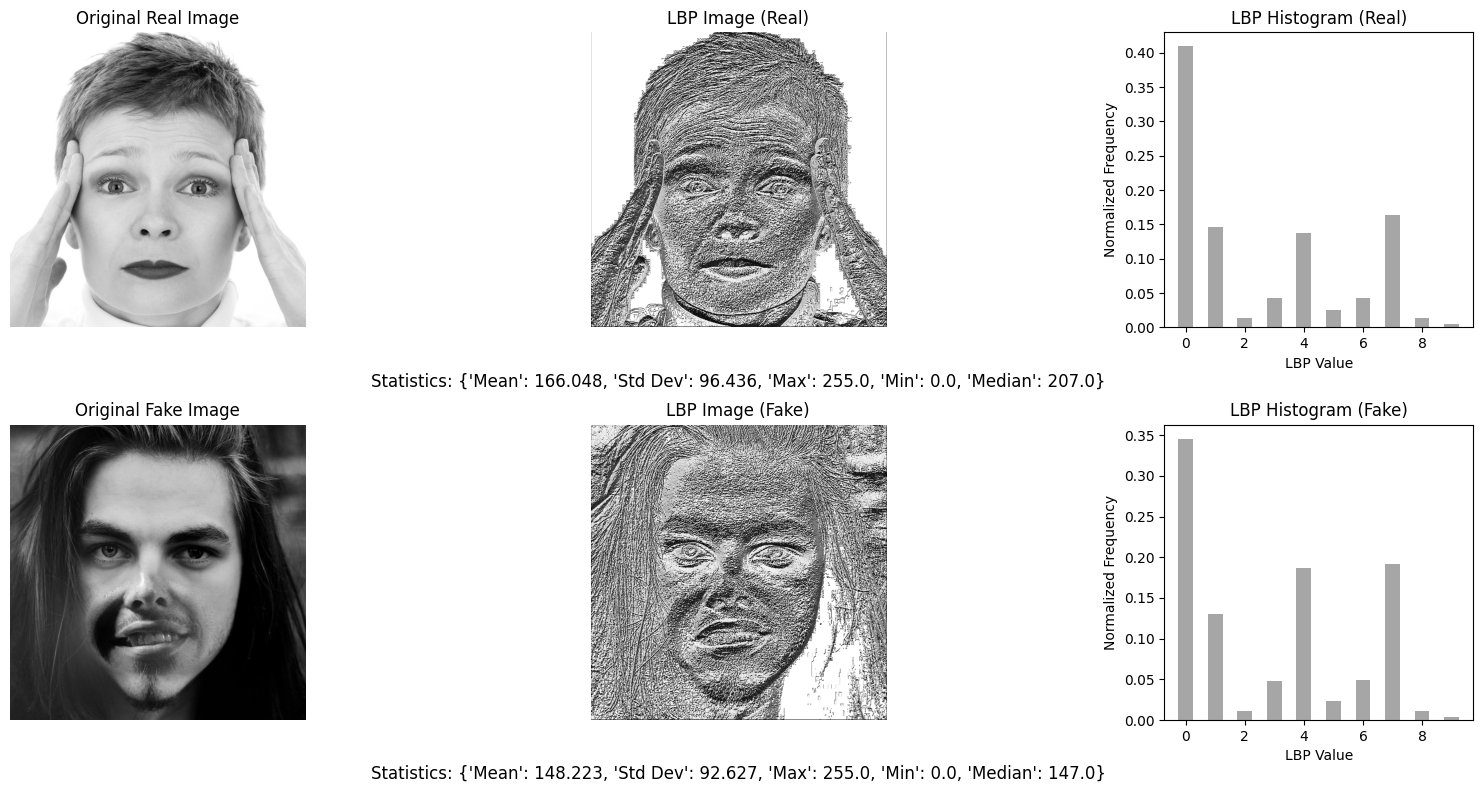

In [26]:
from skimage.feature import local_binary_pattern
import numpy as np
import matplotlib.pyplot as plt

def apply_lbp(img, radius=1, n_points=8):
    """
    Apply Local Binary Pattern (LBP) to detect texture inconsistencies in the images.
    
    Args:
        images (list of np.ndarray): List of images to process.
        radius (int): Radius of the LBP pattern.
        n_points (int): Number of points considered in the LBP pattern.
        
    Returns:
        list of np.ndarray: List of LBP-processed images.
    """
    lbp = local_binary_pattern(img, n_points, radius, method='default')
    return lbp

# Example image for demonstration
# image_0 = cv2.imread(r'..\..\data\raw\real_and_fake_face_detection\real_and_fake_face\training_real\real_00001.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale
# image_1 = cv2.imread(r'..\..\data\raw\real_and_fake_face_detection\real_and_fake_face\training_fake\easy_1_1110.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

n_points = 8

lbp_0 = apply_lbp(image_0)
lbp_1 = apply_lbp(image_1)

print()
# Compute histograms for LBP images
lbp_hist_0, bins_0 = np.histogram(lbp_0, bins=range(0, n_points + 3), density=True)
lbp_hist_1, bins_1 = np.histogram(lbp_1, bins=range(0, n_points + 3), density=True)

# Set up the plots
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Original Image (Real)
axs[0, 0].imshow(image_0, cmap='gray')
axs[0, 0].set_title('Original Real Image')
axs[0, 0].axis('off')

# LBP Image (Real)
axs[0, 1].imshow(lbp_0, cmap='gray')
axs[0, 1].set_title('LBP Image (Real)')
axs[0, 1].axis('off')
axs[0, 1].text(0.5, -0.2, f'Statistics: {extract_statistics(lbp_0)}', transform=axs[0, 1].transAxes, fontsize=12, ha='center')

# Histogram of LBP (Real)
axs[0, 2].bar(bins_0[:-1], lbp_hist_0, width=0.5, color='gray', alpha=0.7)
axs[0, 2].set_title('LBP Histogram (Real)')
axs[0, 2].set_xlabel('LBP Value')
axs[0, 2].set_ylabel('Normalized Frequency')

# Original Image (Fake)
axs[1, 0].imshow(image_1, cmap='gray')
axs[1, 0].set_title('Original Fake Image')
axs[1, 0].axis('off')

# LBP Image (Fake)
axs[1, 1].imshow(lbp_1, cmap='gray')
axs[1, 1].set_title('LBP Image (Fake)')
axs[1, 1].axis('off')
axs[1, 1].text(0.5, -0.2, f'Statistics: {extract_statistics(lbp_1)}', transform=axs[1, 1].transAxes, fontsize=12, ha='center')

# Histogram of LBP (Fake)
axs[1, 2].bar(bins_1[:-1], lbp_hist_1, width=0.5, color='gray', alpha=0.7)
axs[1, 2].set_title('LBP Histogram (Fake)')
axs[1, 2].set_xlabel('LBP Value')
axs[1, 2].set_ylabel('Normalized Frequency')

plt.tight_layout()
plt.show()

In [32]:
import cv2

def apply_sobel(img):
    """
    Apply Sobel edge detection to each image.
    
    Args:
        images (list of np.ndarray): List of images to process.
    
    Returns:
        list of np.ndarray: List of Sobel edge-detected images.
    """
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # X direction
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Y direction
    sobel_combined = cv2.magnitude(sobelx, sobely)        
    return sobel_combined

def compute_histogram(image, bins=9):
    """
    Compute a histogram of the power spectrum for the given image.
    
    Args:
        image (np.ndarray): Image to compute histogram on.
        bins (int): Number of histogram bins.
        
    Returns:
        np.ndarray: Normalized histogram of the image.
    """
    histogram, bin_edges = np.histogram(image, bins=bins, range=(image.min(), image.max()))
    histogram = histogram / np.sum(histogram)  # Normalize histogram
    return histogram

# Example image for demonstration
# image_0 = cv2.imread(r'..\..\data\raw\real_and_fake_face_detection\real_and_fake_face\training_real\real_00001.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale
# image_1 = cv2.imread(r'..\..\data\raw\real_and_fake_face_detection\real_and_fake_face\training_fake\easy_1_1110.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

sobel_0=apply_sobel(image_0)
sobel_1=apply_sobel(image_1)

# Compute histograms for Sobel images
bins=9
sobel_hist_0, bins_0 = compute_histogram(sobel_0, bins)
sobel_hist_1, bins_1 = compute_histogram(sobel_1, bins)

print(sobel_hist_0)
# Set up the plots
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Original Image (Real)
axs[0, 0].imshow(image_0, cmap='gray')
axs[0, 0].set_title('Original Real Image')
axs[0, 0].axis('off')

# Sobel Image (Real)
axs[0, 1].imshow(sobel_0, cmap='gray')
axs[0, 1].set_title('Sobel Image (Real)')
axs[0, 1].axis('off')
axs[0, 1].text(0.5, -0.2, f'Statistics: {extract_statistics(sobel_0)}', transform=axs[0, 1].transAxes, fontsize=12, ha='center')

# Histogram of Sobel (Real)
axs[0, 2].bar(bins_0[:-1], sobel_hist_0, width=1, color='gray', alpha=0.7)
axs[0, 2].set_title('Sobel Histogram (Real)')
axs[0, 2].set_xlabel('Gradient Magnitude')
axs[0, 2].set_ylabel('Normalized Frequency')

# Original Image (Fake)
axs[1, 0].imshow(image_1, cmap='gray')
axs[1, 0].set_title('Original Fake Image')
axs[1, 0].axis('off')

# Sobel Image (Fake)
axs[1, 1].imshow(sobel_1, cmap='gray')
axs[1, 1].set_title('Sobel Image (Fake)')
axs[1, 1].axis('off')
axs[1, 1].text(0.5, -0.2, f'Statistics: {extract_statistics(sobel_1)}', transform=axs[1, 1].transAxes, fontsize=12, ha='center')

# Histogram of Sobel (Fake)
axs[1, 2].bar(bins_1[:-1], sobel_hist_1, width=1, color='gray', alpha=0.7)
axs[1, 2].set_title('Sobel Histogram (Fake)')
axs[1, 2].set_xlabel('Gradient Magnitude')
axs[1, 2].set_ylabel('Normalized Frequency')

plt.tight_layout()
plt.show()



ValueError: too many values to unpack (expected 2)

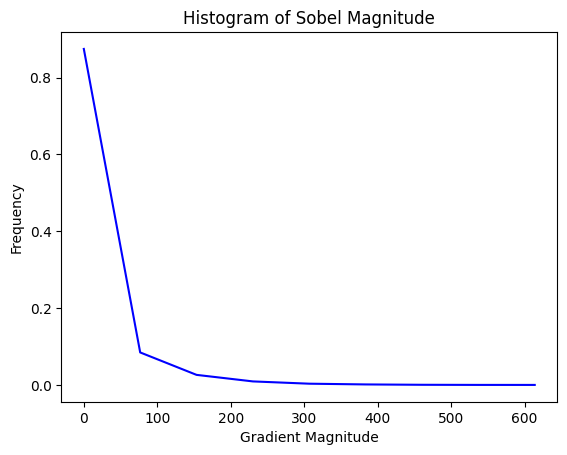

[  0.          76.73877446 153.47754893 230.21632339 306.95509785
 383.69387232 460.43264678 537.17142125 613.91019571 690.64897017]
[8.74663889e-01 8.46416667e-02 2.62361111e-02 9.20555556e-03
 3.26388889e-03 1.35277778e-03 4.30555556e-04 1.27777778e-04
 7.77777778e-05] None


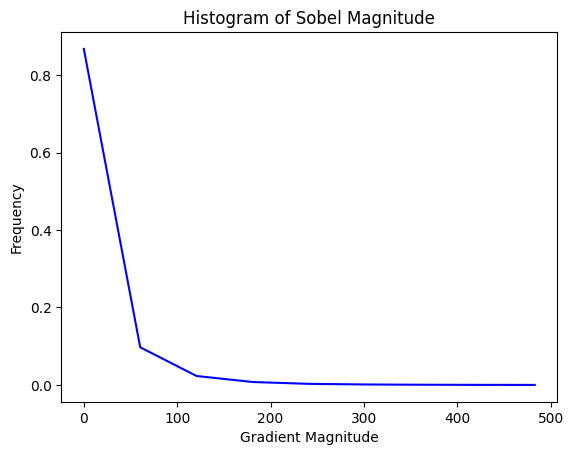

[8.67508333e-01 9.72083333e-02 2.30638889e-02 7.51388889e-03
 2.78888889e-03 1.19166667e-03 5.02777778e-04 1.97222222e-04
 2.50000000e-05]


In [38]:

# Apply Sobel filter in x and y directions
sobel_x = cv2.Sobel(image_0, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_0, cv2.CV_64F, 0, 1, ksize=3)

sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
histogram, bin_edges = np.histogram(sobel_magnitude, bins=9, range=(0, np.max(sobel_magnitude)))
histogram = histogram / np.sum(histogram)
plt.plot(bin_edges[:-1], histogram, color='blue')
plt.title("Histogram of Sobel Magnitude")
plt.xlabel("Gradient Magnitude")
plt.ylabel("Frequency")
plt.show()
print(histogram, print(bin_edges))

# Apply Sobel filter in x and y directions
sobel_x = cv2.Sobel(image_1, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_1, cv2.CV_64F, 0, 1, ksize=3)

sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
histogram, bin_edges = np.histogram(sobel_magnitude, bins=9, range=(0, np.max(sobel_magnitude)))
histogram = histogram / np.sum(histogram)
plt.plot(bin_edges[:-1], histogram, color='blue')
plt.title("Histogram of Sobel Magnitude")
plt.xlabel("Gradient Magnitude")
plt.ylabel("Frequency")
plt.show()

print(histogram)

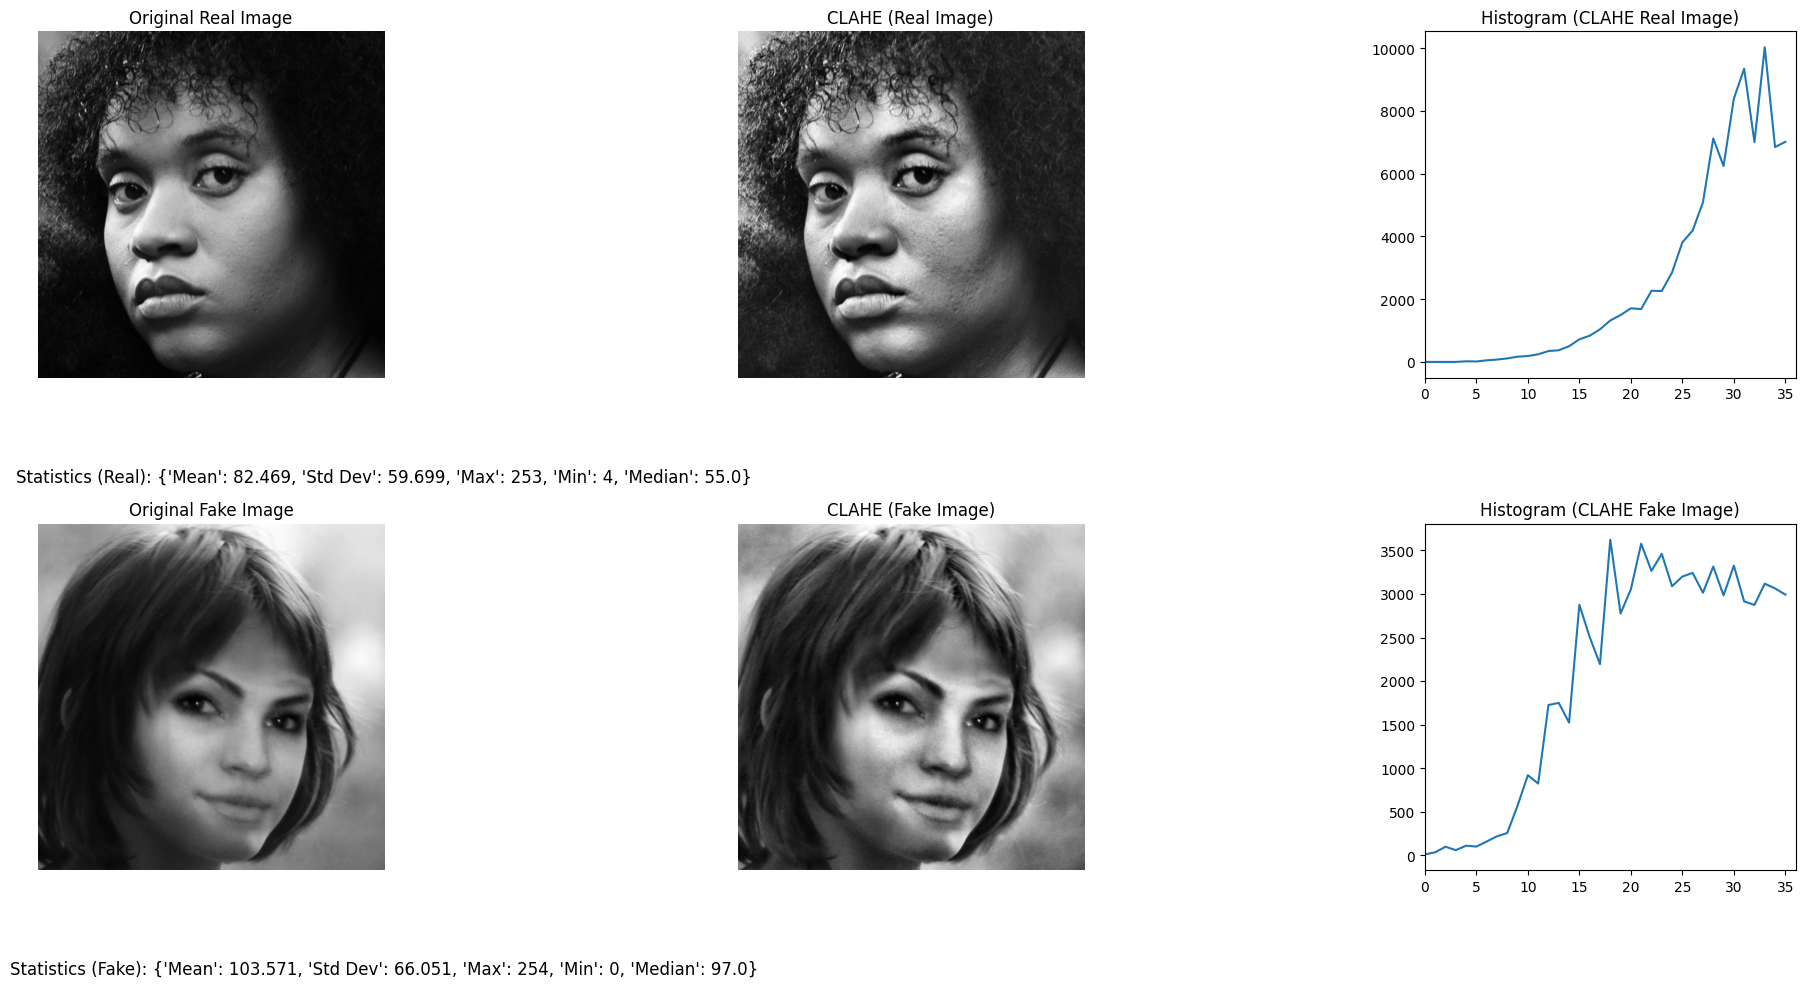

In [58]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the CLAHE function
def apply_clahe(img, clip_limit=2.0, tile_grid_size=(8, 8)):
    """
    Apply Contrast Limited Adaptive Histogram Equalization (CLAHE) to an image.

    Parameters:
    - image: Input image (grayscale or color).
    - clip_limit: Threshold for contrast limiting.
    - tile_grid_size: Size of grid for histogram equalization (height, width).

    Returns:
    - clahe_image: Image after applying CLAHE.
    """
    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)

    # Apply CLAHE to the grayscale image
    clahe_image = clahe.apply(img)

    return clahe_image

# Load example images
# image_0 = cv2.imread(r'..\..\data\raw\real_and_fake_face_detection\real_and_fake_face\training_real\real_00001.jpg',cv2.IMREAD_GRAYSCALE)  # Real image
# image_1 = cv2.imread(r'..\..\data\raw\real_and_fake_face_detection\real_and_fake_face\training_fake\easy_1_1110.jpg',cv2.IMREAD_GRAYSCALE)  # Fake image

# Apply CLAHE
clahe_image_0 = apply_clahe(image_0)
clahe_image_1 = apply_clahe(image_1)

# Compute histograms
bins=36
histogram, bin_edges = np.histogram(clahe_image_0, bins=bins, range=(0, clahe_image_1.max()))
hist_0 = histogram / np.sum(histogram)  # Normalize histogram
hist_0 = cv2.calcHist([clahe_image_0], [0], None, [bins], [0, bins])
hist_1 = cv2.calcHist([clahe_image_1], [0], None, [bins], [0, bins])

# Create plots
fig_clahe, axs_clahe = plt.subplots(2, 3, figsize=(18, 10))

# Original Real Image
axs_clahe[0, 0].imshow(image_0, cmap='gray')  # Convert BGR to RGB for correct color representation
axs_clahe[0, 0].set_title('Original Real Image')
axs_clahe[0, 0].axis('off')

# CLAHE Image for Real
axs_clahe[0, 1].imshow(clahe_image_0, cmap='gray')
axs_clahe[0, 1].set_title('CLAHE (Real Image)')
axs_clahe[0, 1].axis('off')

# Histogram for CLAHE Real
axs_clahe[0, 2].plot(hist_0)
axs_clahe[0, 2].set_title('Histogram (CLAHE Real Image)')
axs_clahe[0, 2].set_xlim([0, bins])

# Original Fake Image
axs_clahe[1, 0].imshow(image_1, cmap='gray')  # Convert BGR to RGB for correct color representation
axs_clahe[1, 0].set_title('Original Fake Image')
axs_clahe[1, 0].axis('off')

# CLAHE Image for Fake
axs_clahe[1, 1].imshow(clahe_image_1, cmap='gray')
axs_clahe[1, 1].set_title('CLAHE (Fake Image)')
axs_clahe[1, 1].axis('off')

# Histogram for CLAHE Fake
axs_clahe[1, 2].plot(hist_1)
axs_clahe[1, 2].set_title('Histogram (CLAHE Fake Image)')
axs_clahe[1, 2].set_xlim([0, bins])

# Display statistics
axs_clahe[0, 0].text(1, -0.3, f'Statistics (Real): {extract_statistics(clahe_image_0)}', 
                     transform=axs_clahe[0, 0].transAxes, fontsize=12, ha='center')

axs_clahe[1, 0].text(1, -0.3, f'Statistics (Fake): {extract_statistics(clahe_image_1)}', 
                     transform=axs_clahe[1, 0].transAxes, fontsize=12, ha='center')

plt.tight_layout()
plt.show()


0.04555963


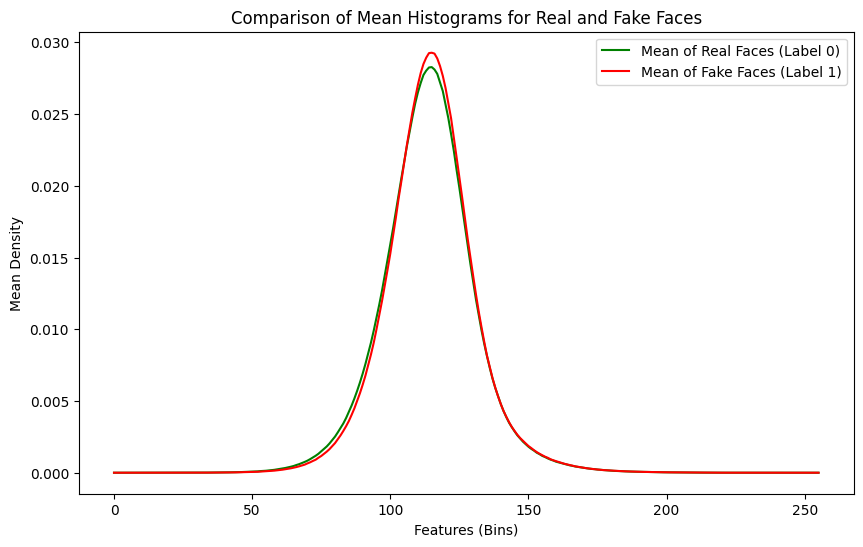

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load train and test features and labels
benchmark=9
train_features = np.load(rf'C:\Users\tanbe\OneDrive\Desktop\Works\HWUM\FYP\fakefacedetect\data\processed\real_and_fake_face_5\train\features_{benchmark}.npy')  # Replace with your actual path
train_labels = np.load(rf'C:\Users\tanbe\OneDrive\Desktop\Works\HWUM\FYP\fakefacedetect\data\processed\real_and_fake_face_5\train\labels_{benchmark}.npy')
test_features = np.load(rf'C:\Users\tanbe\OneDrive\Desktop\Works\HWUM\FYP\fakefacedetect\data\processed\real_and_fake_face_5\test\features_{benchmark}.npy')    # Replace with your actual path
test_labels = np.load(rf'C:\Users\tanbe\OneDrive\Desktop\Works\HWUM\FYP\fakefacedetect\data\processed\real_and_fake_face_5\test\labels_{benchmark}.npy')

# Combine the features and labels from train and test sets
all_features = np.vstack((train_features, test_features))
all_labels = np.hstack((train_labels, test_labels))

# Separate features by label: 0 (real) and 1 (fake)
real_features = all_features[all_labels == 0]
fake_features = all_features[all_labels == 1]

print(np.max(all_features))
# Calculate the mean across the 256 features (bins) for each label
mean_real = np.mean(real_features, axis=0)
mean_fake = np.mean(fake_features, axis=0)

# Plot the histograms of the means for real and fake labels
plt.figure(figsize=(10, 6))

# Plot for real features
plt.plot(range(all_features.shape[1]), mean_real, label='Mean of Real Faces (Label 0)', color='green')

# Plot for fake features
plt.plot(range(all_features.shape[1]), mean_fake, label='Mean of Fake Faces (Label 1)', color='red')

# Add titles and labels
plt.title('Comparison of Mean Histograms for Real and Fake Faces')
plt.xlabel('Features (Bins)')
plt.ylabel('Mean Density')
plt.legend()

# Show the plot
plt.show()


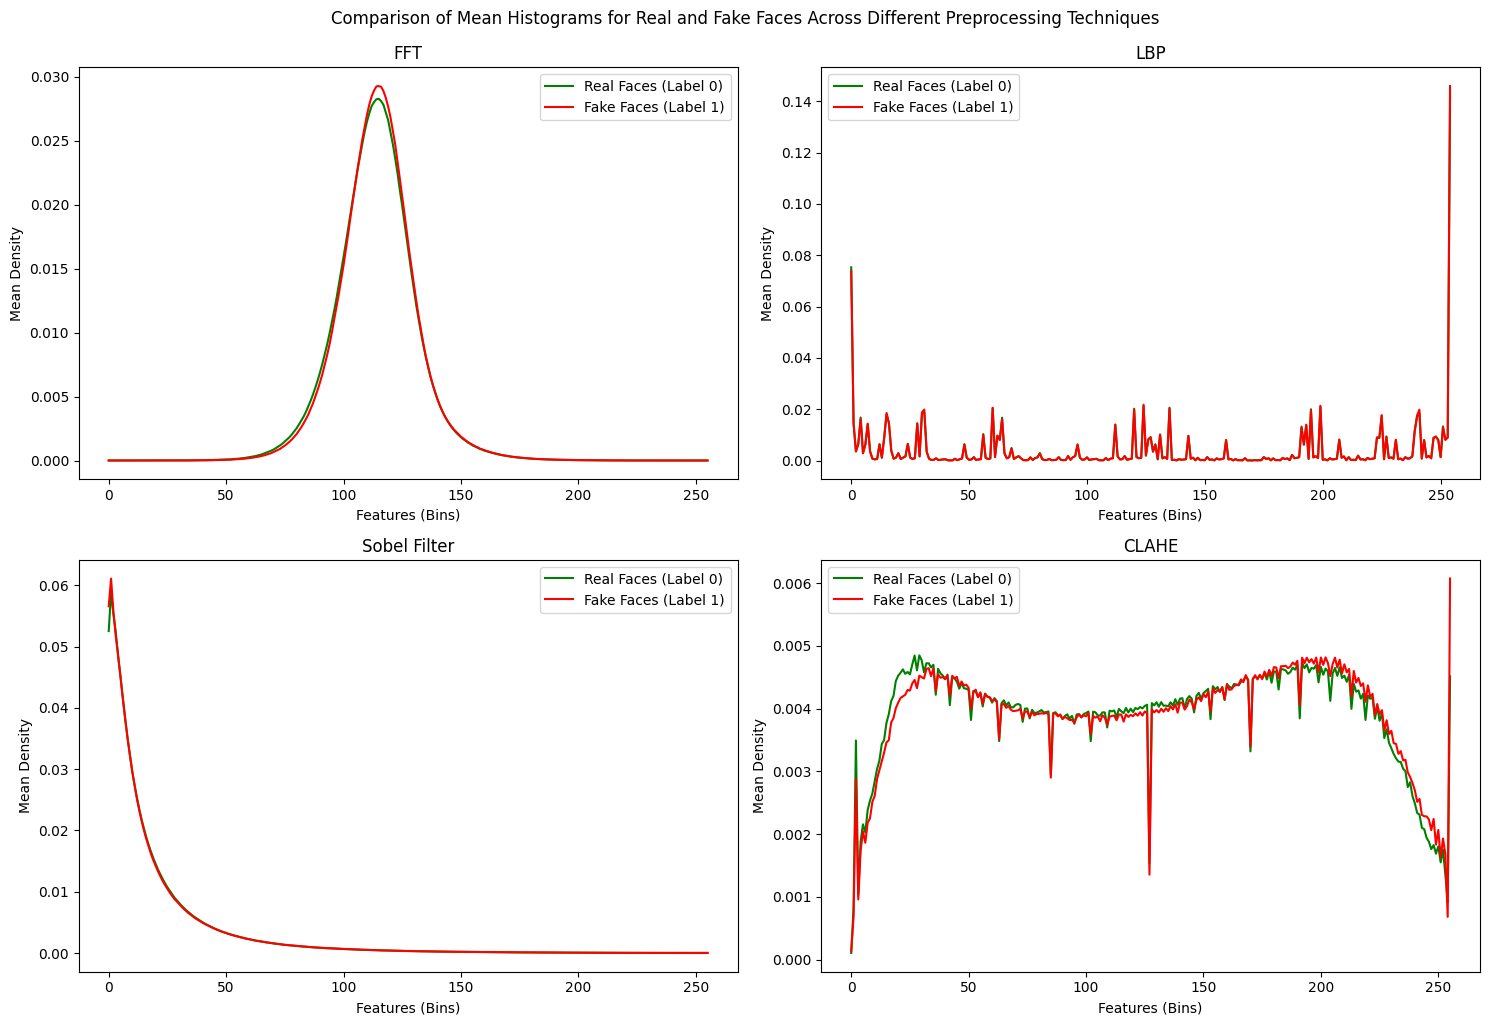

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 

# Set the benchmarks for comparison
benchmarks = {
    9: 'FFT',
    10: 'LBP',
    11: 'Sobel Filter',
    12: 'CLAHE'
}

# Initialize a 2x2 plot grid
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()  # Flatten the array for easier indexing

output_dir=r'C:\Users\tanbe\OneDrive\Desktop\Works\HWUM\FYP\fakefacedetect\results\figures'

# Loop through each benchmark to load data, process, and plot
for idx, (benchmark, title) in enumerate(benchmarks.items()):
    # Load train and test features and labels for each benchmark
    train_features = np.load(rf'C:\Users\tanbe\OneDrive\Desktop\Works\HWUM\FYP\fakefacedetect\data\processed\real_and_fake_face_5\train\features_{benchmark}.npy')
    train_labels = np.load(rf'C:\Users\tanbe\OneDrive\Desktop\Works\HWUM\FYP\fakefacedetect\data\processed\real_and_fake_face_5\train\labels_{benchmark}.npy')
    test_features = np.load(rf'C:\Users\tanbe\OneDrive\Desktop\Works\HWUM\FYP\fakefacedetect\data\processed\real_and_fake_face_5\test\features_{benchmark}.npy')
    test_labels = np.load(rf'C:\Users\tanbe\OneDrive\Desktop\Works\HWUM\FYP\fakefacedetect\data\processed\real_and_fake_face_5\test\labels_{benchmark}.npy')

    # Combine features and labels
    all_features = np.vstack((train_features, test_features))
    all_labels = np.hstack((train_labels, test_labels))

    # Separate features by label: 0 (real) and 1 (fake)
    real_features = all_features[all_labels == 0]
    fake_features = all_features[all_labels == 1]

    # Calculate the mean across the 256 features (bins) for each label
    mean_real = np.mean(real_features, axis=0)
    mean_fake = np.mean(fake_features, axis=0)

    # Plot the means for real and fake in the current subplot
    axs[idx].plot(range(all_features.shape[1]), mean_real, label='Real Faces (Label 0)', color='green')
    axs[idx].plot(range(all_features.shape[1]), mean_fake, label='Fake Faces (Label 1)', color='red')
    axs[idx].set_title(f'{title}') #(Benchmark {benchmark})
    axs[idx].set_xlabel('Features (Bins)')
    axs[idx].set_ylabel('Mean Density')
    axs[idx].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Comparison of Mean Histograms for Real and Fake Faces Across Different Preprocessing Techniques', y=1.02)
plt.savefig(os.path.join(output_dir, f'preprocess_real_fake_compare.png'))
plt.show()
